Таблица значений данной функции
1.414   0.100
2.828   0.300
5.657   0.500
11.314   0.700
22.627   0.900
45.255   1.100
90.510   1.300
181.019   1.500
362.039   1.700
724.077   1.900


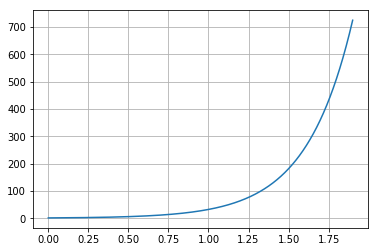

In [6]:
import math
from matplotlib import pylab as plt
%matplotlib inline

#функция
f = lambda x: 2**(5*x)

import numpy as np
x = np.linspace(0, 1.9, 100000)
plt.plot(x, f(x), label='f(x)')
plt.grid(True)
#записываем таблицу значений в массивы
GN = 10
x = [0 for k in range(GN)]
y = [0 for k in range(GN)]

ind = 0
for i in range(1,20,2):
    x[ind] = i/10
    ind+=1
for i in range(GN):
    y[i] = f(x[i])


#выводим таблицу значений
print("Таблица значений данной функции")
for i in range (GN):
    print( '%.3f' % y[i], ' ','%.3f' % x[i])


In [4]:
#сюда будем писать разделенные разности (пока заполним нулями)
diffs = [[0 for i in range(GN)] for n in range(GN)]

#первый столбец массива - значения y
for i in range(GN):
    diffs[i][0] = y[i]

#для осознания: первый порядок 
#diffs[0][1] = (diffs[0][0] - diffs[0+1][0]) / (x[0] - x[0+1])
#diffs[1][1] = (diffs[1][0] - diffs[1+1][0]) / (x[1] - x[1+1])
#для осознания: второй порядок
#diffs[0][2] = (diffs[0][1] - diffs[0+1][1]) / (x[0]-x[2])

#все осознано. полный цикл:
for n in range(1,GN):
    for i in range(GN-n):
        diffs[i][n] = (diffs[i][n-1] - diffs[i+1][n-1]) / (x[i] - x[i+n])

#вывод массива
print("Разделенные разности")
for i in range (GN):
    for n in range (GN):
        print('%.3f' % diffs[i][n],end=" ")
    print('')


Разделенные разности
1.414 7.071 17.678 29.463 36.828 36.828 30.690 21.922 13.701 7.612 
2.828 14.142 35.355 58.926 73.657 73.657 61.381 43.843 27.402 0.000 
5.657 28.284 70.711 117.851 147.314 147.314 122.762 87.687 0.000 0.000 
11.314 56.569 141.421 235.702 294.628 294.628 245.523 0.000 0.000 0.000 
22.627 113.137 282.843 471.405 589.256 589.256 0.000 0.000 0.000 0.000 
45.255 226.274 565.685 942.809 1178.511 0.000 0.000 0.000 0.000 0.000 
90.510 452.548 1131.371 1885.618 0.000 0.000 0.000 0.000 0.000 0.000 
181.019 905.097 2262.742 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
362.039 1810.193 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
724.077 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 


 
Значения интерп. функции в точках между исходными
2.007   0.200
3.999   0.400
8.000   0.600
16.000   0.800
32.000   1.000
64.000   1.200
128.001   1.400
255.998   1.600
512.012   1.800


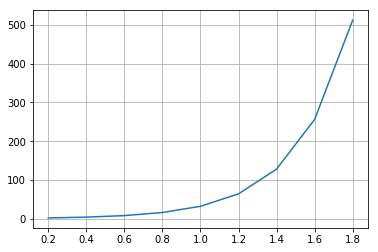

In [5]:
#сюда пишем дискретные значения аппроксимирующей функции (а для начала заполняем нулями)
yINT = [0 for i in range(GN-1)]
#точки x, в которых будем искать значения аппрох. функции (не должны быть равны данным x)
r = (x[1] - x[0])/2
xINT = [x[i]+r for i in range(GN-1)]

#проход по точкам, в которых ищем знаение интерпол. функции
p = 1
s = 0
for i in range(GN-1):
    #складываем все в сумму
    for j in range(1,GN):
        #считаем произведения
        for k in range(j):
            p *= (xINT[i] - x[k])
        #домножаем на y(x0,x1..xk)
        p *= diffs[0][j]
        s += p
        p = 1
    #не забываем про y0 (!!!)
    s += y[0]
    yINT[i] = s
    s = 0

print(' ')
print("Значения интерп. функции в точках между исходными")
for i in range (GN-1):
    print( '%.3f' % yINT[i], ' ','%.3f' % xINT[i])
plt.plot(xINT,yINT)
plt.grid(True)